# Alinhamento de Malha

In [26]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

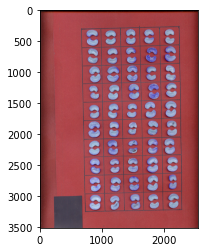

In [27]:
# Leitura da imagem da malha com as sementes
imagem_original = cv2.imread("interno.jpeg")

# Tamanho da imagem
[x, y, z] = np.shape(imagem_original)

plt.imshow(imagem_original)
plt.show()

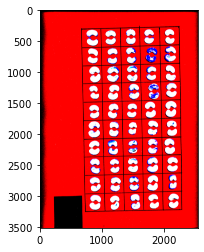

In [28]:
# Faz a segmentacao com thresholding
(T, imagem_thresh) = cv2.threshold(imagem_original, 115, 255, cv2.THRESH_BINARY)

plt.imshow(imagem_thresh)
plt.show()

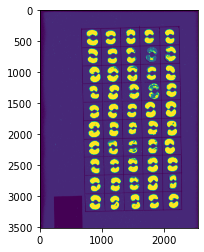

In [29]:
# Deixa a imagem em escala de cinza
imagem_cinza = cv2.cvtColor(imagem_thresh, cv2.COLOR_BGR2GRAY)

plt.imshow(imagem_cinza)
plt.show()

In [30]:
# Prepara para alinhamento
# Ponto de busca da borda da malha situado na parte superior esquerda da imagem
ponto_busca1 = [int(x*(1/3)), int(y*(2/11))]

# Ponto situado na parte inferior esquerda da imagem
ponto_busca2 = [int(x*(2/3)), int(y*(2/11))]

In [31]:
# Move o ponto de busca 1 a direita ate encontrar a borda da malha
while True:
    if (imagem_cinza[ponto_busca1[0], ponto_busca1[1]] == 0):
                # Sai do loop com coordenada x na borda da malha
                break

    # Caso pixel nao possua os valores desejados
    ponto_busca1[1] = ponto_busca1[1] + 1

# Move o ponto de busca 2 a direita ate encontrar a borda da malha
while True:
    if (imagem_cinza[ponto_busca2[0], ponto_busca2[1]] == 0 ):
                # Sai do loop com coordenada x na borda da malha
                break

    # Caso pixel nao possua os valores desejados
    ponto_busca2[1] = ponto_busca2[1] + 1

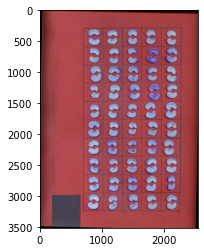

In [32]:
# Rotaciona a imagem
# Calculo do angulo de rotacao utilizando trigonometria
L1 = ponto_busca2[0] - ponto_busca1[0] # Cateto adjacente
L2 = ponto_busca2[1] - ponto_busca1[1] # Cateto oposto
angulo = np.arctan(L2/L1)
angulo = np.rad2deg(angulo)
imagem_rot = imutils.rotate(imagem_original, -angulo)

plt.imshow(imagem_rot)
plt.show()